In [134]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

wc1_df = pd.read_csv('Desktop/data portfolio resources/worldcups.csv')
wc2_df = pd.read_csv('Desktop/data portfolio resources/WC_overall.csv',sep=';')

In [107]:
wc1_df.head()

,year,host,winner,second,third,fourth,goals_scored,teams,games,attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,434000
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,395000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,483000
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1337000
4,1954,Switzerland,West Germany,Hungary,Austria,Uruguay,140,16,26,943000


In [108]:
wc2_df.head()

,World Cup,Champion,Teams,Matches,Goals,AVG Goals/match,Red Card,Yellow Card
0,Uruguay 1930,Uruguay,13,18,70,3.89,-,-
1,Italy 1934,Italy,16,17,70,4.12,-,-
2,France 1938,Italy,16,18,84,4.67,-,-
3,Brazil 1950,Uruguay,13,22,88,4.00,-,-
4,Switzerland 1954,Germany,16,26,140,5.38,-,-


In [109]:
print(f'wc1: {wc1_df.shape}    wc2: {wc2_df.shape}')

wc1: (21, 10)    wc2: (21, 8)


In [110]:
frames = [wc1_df, wc2_df]
wc_df = pd.concat(frames, axis=1)
wc_df.drop('Champion',axis=1,inplace=True)
wc_df.drop('Teams',axis=1,inplace=True)
wc_df.drop('Goals',axis=1,inplace=True)
wc_df = wc_df.replace('West Germany', 'Germany', regex=True)
wc_df

,year,host,winner,second,third,fourth,goals_scored,teams,games,attendance,World Cup,Matches,AVG Goals/match,Red Card,Yellow Card
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,434000,Uruguay 1930,18,3.89,-,-
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,395000,Italy 1934,17,4.12,-,-
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,483000,France 1938,18,4.67,-,-
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1337000,Brazil 1950,22,4.00,-,-
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,943000,Switzerland 1954,26,5.38,-,-
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,868000,Sweden 1958,35,3.60,-,-
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,776000,Chile 1962,32,2.78,-,-
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1614677,England 1966,32,2.78,21,5
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1673975,Mexico 1970,32,2.97,51,0
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1774022,Germany 1974,38,2.55,87,5


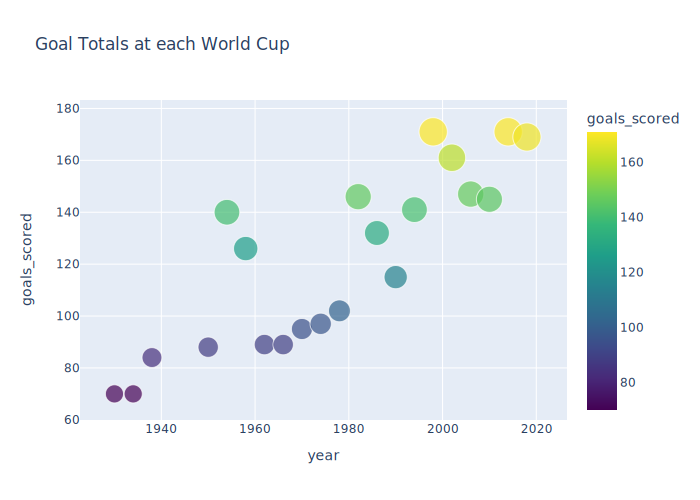

In [123]:
fig = px.scatter(wc_df,x='year',y='goals_scored',color='goals_scored',size='goals_scored',title='Goal Totals at each World Cup',
          color_continuous_scale=px.colors.sequential.Viridis)
fig.show('svg')

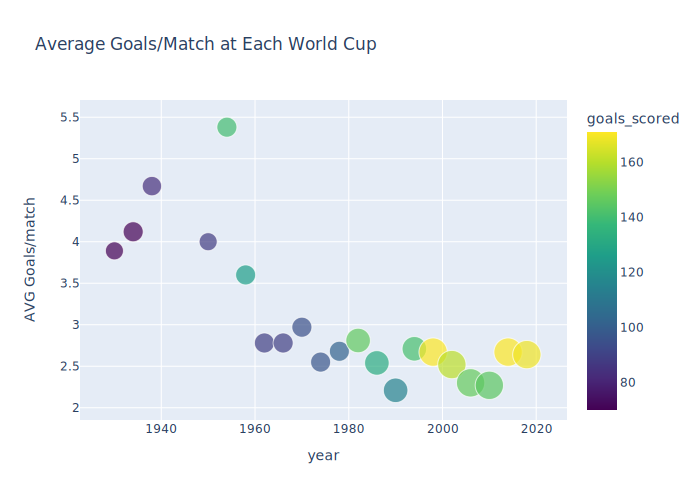

In [124]:
fig = px.scatter(wc_df,x='year',y='AVG Goals/match',color='goals_scored',size='teams',title='Average Goals/Match at Each World Cup',
          color_continuous_scale=px.colors.sequential.Viridis)
fig.show('svg')

Color: Goals Scored, Size: Total Teams in World Cup

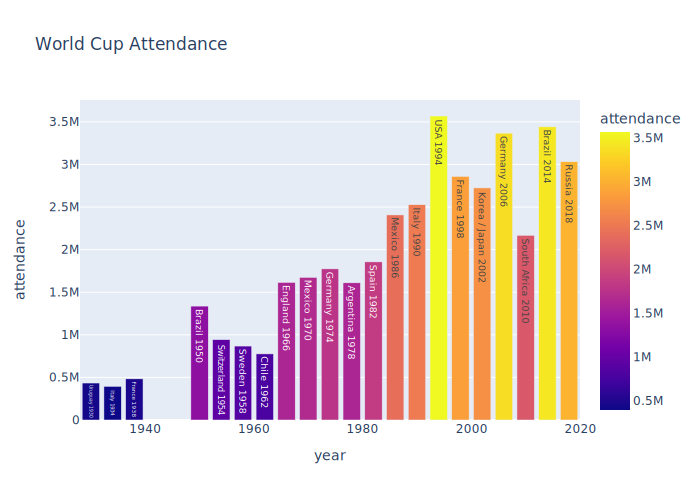

In [125]:
fig = px.bar(wc_df,x='year',y='attendance',color='attendance',text='World Cup',title='World Cup Attendance')
fig.show('svg')

In [114]:
wc_df['winner']

0       Uruguay
1         Italy
2         Italy
3       Uruguay
4       Germany
5        Brazil
6        Brazil
7       England
8        Brazil
9       Germany
10    Argentina
11        Italy
12    Argentina
13      Germany
14       Brazil
15       France
16       Brazil
17        Italy
18        Spain
19      Germany
20       France
Name: winner, dtype: object

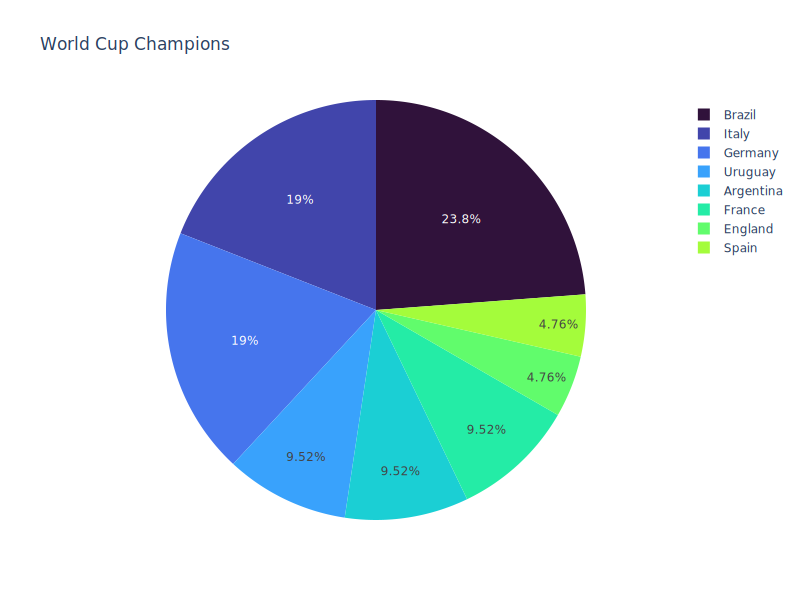

In [152]:
winners = ['Uruguay','Italy','Germany','Brazil','England','Argentina','France','Spain']
times_won = [2,4,4,5,1,2,2,1]
fig = px.pie(values=times_won,names=winners,title='World Cup Champions', 
       color_discrete_sequence=px.colors.sequential.Turbo)

fig.update_layout(width=800,height=600)
fig.show('svg')

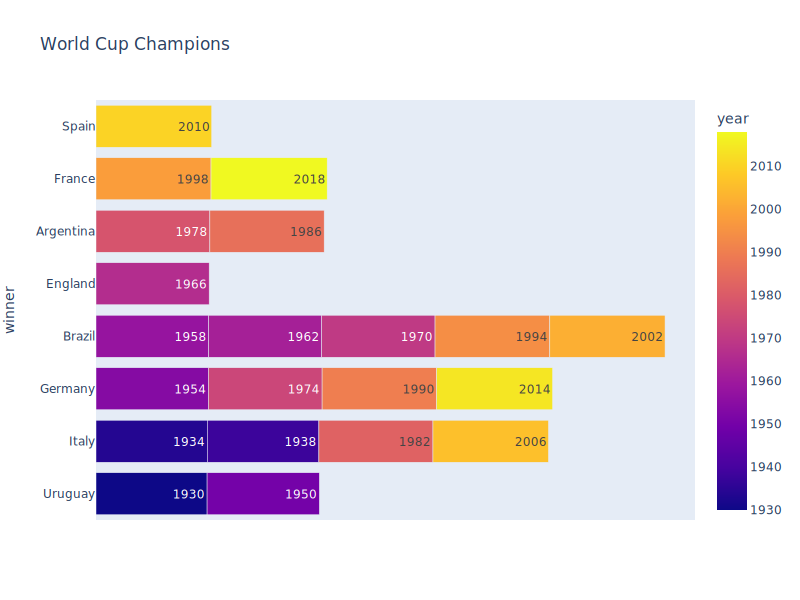

In [151]:
fig = px.bar(wc_df,x='year',y='winner',text_auto=True,title='World Cup Champions',color='year')
fig.update_xaxes(showgrid=False, visible=False)

fig.update_layout(width=800,height=600)
fig.show('svg')

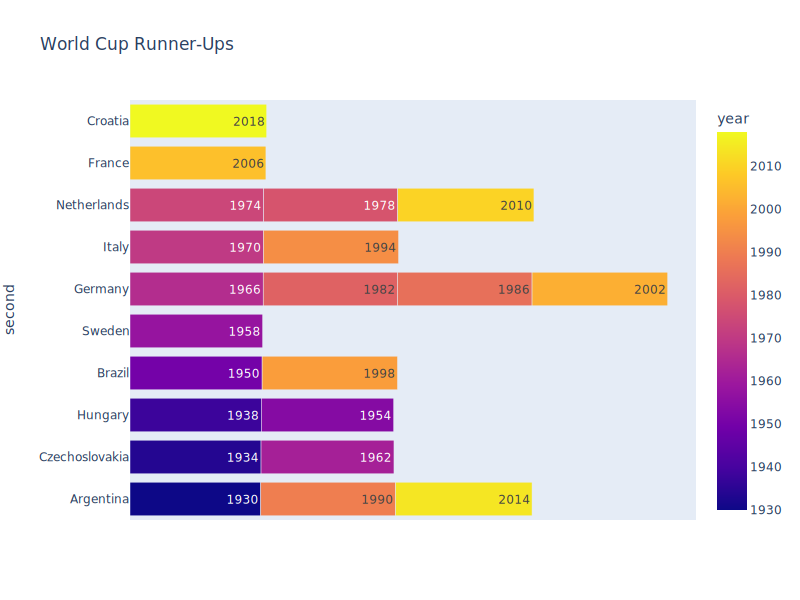

In [150]:
fig = px.bar(wc_df,x='year',y='second',text_auto=True,title='World Cup Runner-Ups',color='year')
fig.update_xaxes(showgrid=False, visible=False)

fig.update_layout(width=800,height=600)
fig.show('svg')

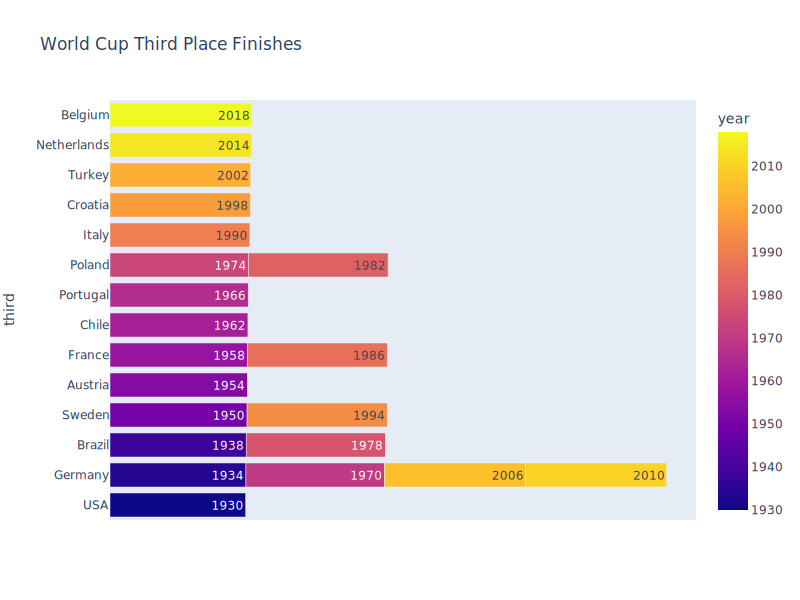

In [149]:
fig = px.bar(wc_df,x='year',y='third',text_auto=True,title='World Cup Third Place Finishes',color='year')
fig.update_xaxes(showgrid=False, visible=False)

fig.update_layout(width=800,height=600)
fig.show('svg')

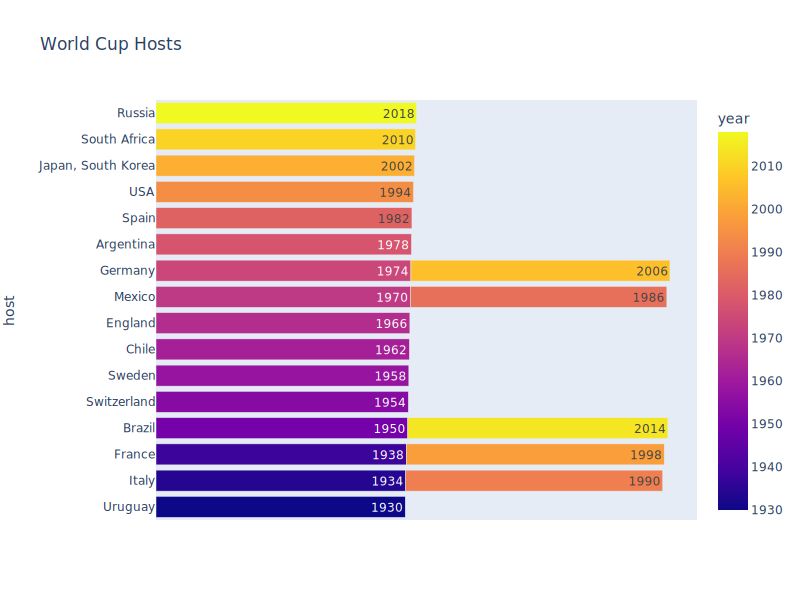

In [148]:
fig = px.bar(wc_df,x='year',y='host',text_auto=True,title='World Cup Hosts',color='year')
fig.update_xaxes(showgrid=False, visible=False)
fig.update_layout(width=800,height=600)

fig.show('svg')

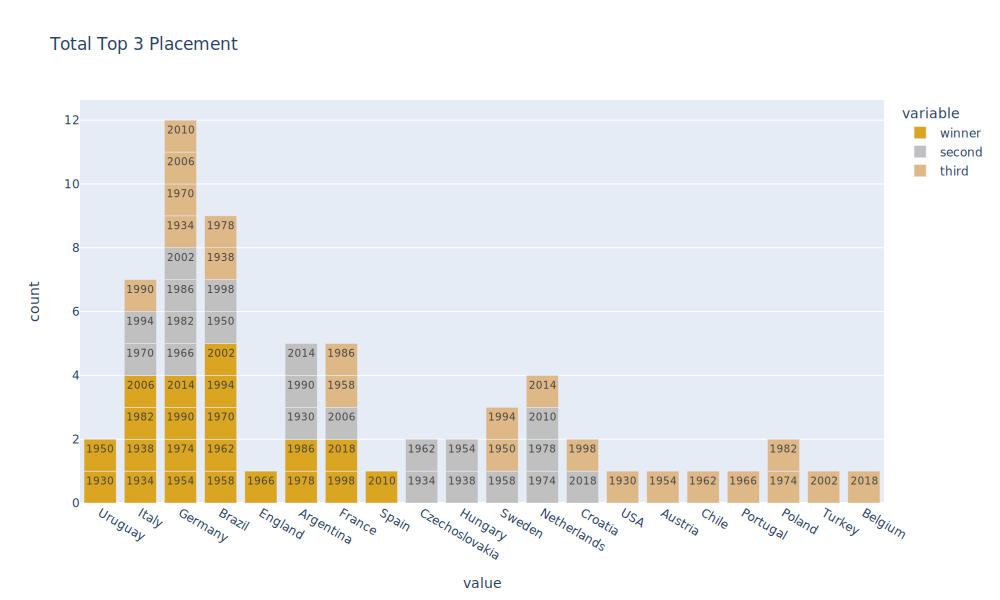

In [146]:
fig = px.bar(wc_df, x="year", y=["winner","second","third"], title="Total Top 3 Placement",text='year',
             color_discrete_sequence=['goldenrod','silver','burlywood'])
fig.update_layout(width=1000,height=600)
fig.show('svg')

In [121]:
fig = px.bar(wc_df, x="year", y="teams", title='Increase in Number of Teams',text='World Cup', color='teams',
            color_continuous_scale=px.colors.sequential.Reds)
fig.show()